(-0.05, 1.05)

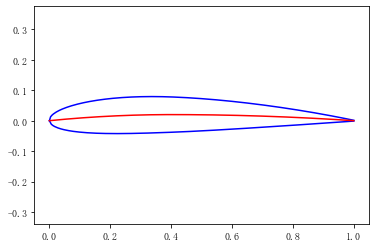

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np

#FROM https://www.pythonheidong.com/blog/article/323896/
#REFERENCE LINK https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

def naca4(x, m, p, t, c=1):
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)  
    return ((x - yt*np.sin(th), yc + yt*np.cos(th)), 
            (x + yt*np.sin(th), yc - yt*np.cos(th)))


#naca2412 
m = 0.02
p = 0.4
t = 0.12
c = 1.0

x = np.linspace(0,1,200)
for item in naca4(x, m, p, t, c):
    plt.plot(item[0], item[1], 'b')

plt.plot(x, camber_line(x, m, p, c), 'r')
plt.axis('equal')
plt.xlim((-0.05, 1.05))
# figure.set_size_inches(16,16,forward=True)

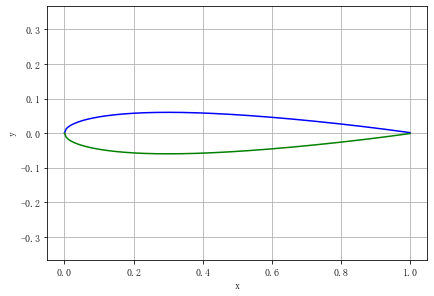

In [3]:
from airfoils import Airfoil
foil = Airfoil.NACA4('0012')
foil.plot()


NACA4_SYMMETRIC_TEST
  NACA4_SYMMETRIC evaluates y(x) for a NACA
  symmetric airfoil defined by a 4-digit code.

  Graphics saved in file "naca4_symmetric_test.png"


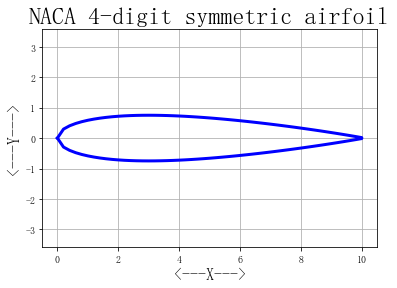

  Data saved in file "naca4_symmetric_test.txt"


In [1]:
def naca4_symmetric ( t, c, x ):
  import numpy as np
  y = 5.0 * t * c * ( \
    0.2969 * np.sqrt ( x / c )\
    + (((( \
      - 0.1015 ) * ( x / c ) \
      + 0.2843 ) * ( x / c ) \
      - 0.3516 ) * ( x / c ) \
      - 0.1260 ) * ( x / c ) )
  return y

def naca4_symmetric_test ( ):
  import matplotlib.pyplot as plt
  import numpy as np

  c = 1.0
  t = 0.12
  dots = 51
  x = np.linspace ( 0.0, c, dots )
  x2 = np.append ( x, np.flip ( x, 0 ) )
  y = naca4_symmetric ( t, c, x )
  y2 = np.append ( y, np.flip ( -y, 0 ) )
#
#  Plot the wing surface.
#
  plt.plot ( x2, y2, 'b-', linewidth = 3 )
  plt.axis ( 'equal' )
  plt.grid ( True )
  plt.xlabel ( '<---X--->', fontsize = 16 )
  plt.ylabel ( '<---Y--->', fontsize = 16 )
  plt.title ( 'NACA 0012 airfoil', fontsize = 24 )

  filename = 'naca4_symmetric_test.png'
  plt.savefig ( filename )
  print ( '' )
  print ( '  Graphics saved in file "%s"' % ( filename ) )
  plt.show ( block = False )
  plt.savefig('test.png',dpi=300,facecolor='white',)
#
#  Save data to a file.
#
  filename = 'naca4_symmetric_test.txt'
  output = open ( filename, 'w' )
  for i in range ( 0, 2 * n ):
    s = '  %g  %g\n' % ( x2[i], y2[i] )
    output.write ( s )
  output.close ( )
  print ( '  Data saved in file "%s"' % ( filename ) )

  return


naca4_symmetric_test()

In [19]:
import numpy as np
np.sinh(180.0*np.pi/180)
np.random.randint(2,10,10)

array([8, 8, 9, 6, 6, 6, 8, 8, 7, 4])

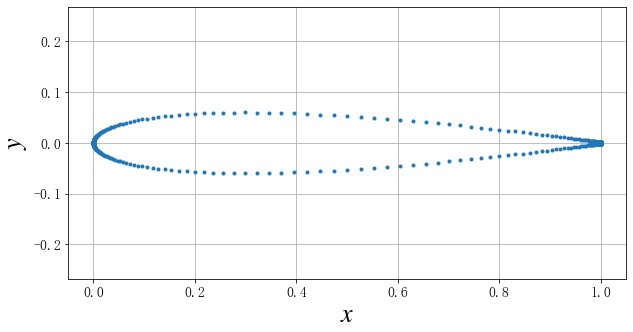

In [94]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np


ds1 = ds2 = 0.0005
c = 1.0
t = 0.12
dots = 201


def gen_x_tanh():
    x = sym.Symbol('x')
    ksi = np.linspace(0.0,c,dots)
    A = np.sqrt(ds2)/np.sqrt(ds1)
    B = 1/(c*np.sqrt(ds1*ds2))
    delta = nsolve(sym.sinh(x)/x - B, x, 11.7)
    delta = np.array(delta,dtype=float)
    u = 0.5*(1+np.tanh(delta*(ksi/c-0.5))/np.tanh(delta/2))
    s = u/(A+(1-A)*u)
    return s*c

def naca4_symmetric(t,c,x):
# real sharp TE NACA0012 airfoil : https://turbmodels.larc.nasa.gov/naca0012numerics_val.html
  import numpy as np
  y = 5.0 * t * c * ( \
    0.2969 * np.sqrt ( x / c )\
    + (((( \
      - 0.1015 ) * ( x / c ) \
      + 0.2843 ) * ( x / c ) \
      - 0.3516 ) * ( x / c ) \
      - 0.1260 ) * ( x / c ) )
#   y = 0.594689181 * c *(\
#       0.298222773 * np.sqrt(x/c) \
#       +(((( \
#        - 0.105174606 )*(x/c) \
#        + 0.291984971 )*(x/c) \
#        - 0.357907906 )*(x/c) \
#        - 0.127125232 )*(x/c) )
  return y


x = gen_x_tanh()
x2 = np.append( x, np.flip(x, 0))
y = naca4_symmetric(t,c,x)
y2 = np.append( y, np.flip(-y, 0))

plt.figure(figsize=(10,5))
plt.plot(x2, y2,'.', linewidth = 3 )
plt.axis('equal')
plt.grid(True)
plt.xlim((-0.05, 1.05))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$x$',fontsize=26)
plt.ylabel('$y$',fontsize=26)
plt.savefig('test.png',dpi=150,facecolor='white')

filename = 'naca00'+str(int(t*100))+'.dat'
output = open(filename,'w')
for i in range (0,2*dots):
    s = '  %g  %g  0.0\n' % (x2[i], y2[i])
    output.write (s)
output.close()

array([0., 0., 0., 0., 0.])